In [1]:
import pandas as pd
df = pd.read_csv('/Users/shoyo/HAIT/n_coffee+vs+temp.csv')

In [2]:
df.head()

,Unnamed: 0,MAX_TEMP,N_COFFEE
0,0,27,167
1,1,17,80
2,2,21,98
3,3,30,167
4,4,28,124


In [3]:
df.loc[:, ['MAX_TEMP']].head()

,MAX_TEMP
0,27
1,17
2,21
3,30
4,28


In [5]:
import numpy as np
X = np.array(df.loc[:, ['MAX_TEMP']])

In [6]:
X[:5]

array([[27],
       [17],
       [21],
       [30],
       [28]])

In [7]:
y = np.array(df.loc[:, ['N_COFFEE']])

In [8]:
y[:5]

array([[167],
       [ 80],
       [ 98],
       [167],
       [124]])

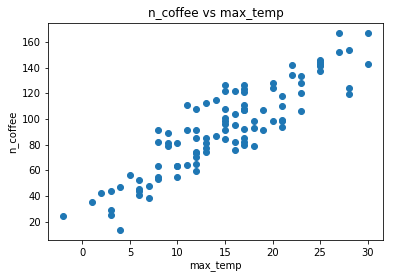

In [9]:
# 散布図を出力
import matplotlib.pyplot as plt
% matplotlib inline             
plt.scatter(X, y)                   # 散布図を表示
plt.title('n_coffee vs max_temp')   # タイトルを表示
plt.xlabel('max_temp')              # x軸のラベルを表示
plt.ylabel('n_coffee')              # y軸のラベルを表示
plt.show()               # 指定した内容でグラフを出力

In [10]:
# 相関係数行列を確認
df.corr()

,Unnamed: 0,MAX_TEMP,N_COFFEE
Unnamed: 0,1.000000,-0.092030,-0.146748
MAX_TEMP,-0.092030,1.000000,0.889654
N_COFFEE,-0.146748,0.889654,1.000000


In [11]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr = LinearRegression()

In [12]:
from sklearn.model_selection import learning_curve
lc = learning_curve(lr, X, y)

In [13]:
# 単回帰モデルを学習
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# 定数項を確認
lr.intercept_

array([28.69742186])

In [15]:
# 係数を確認
lr.coef_

array([[4.26942921]])

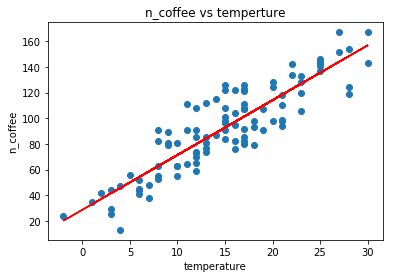

In [16]:
# 散布図に近似直線を重ねてみる
plt.scatter(X, y)                       # 散布図を表示
plt.plot(X, lr.predict(X), color='red') # 回帰直線を表示
plt.title('n_coffee vs temperture')     # グラフのタイトルを表示
plt.xlabel('temperature')               # x軸のラベルを表示
plt.ylabel('n_coffee')                  # y軸のラベルを表示
plt.show()                              # 上記の内容でグラフを表示

In [17]:
# その日の気温を入力
new_temp = 30

# その日のアイスコーヒーの売上個数を予測
n_pred = lr.predict(new_temp)
print(n_pred)

[[156.78029823]]
